In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('manufat.csv')

df.drop(['Unnamed: 0', 'name'], axis=1, inplace=True)

In [2]:
x = np.array(df['t_n'])
y = np.array(df['y_n'])

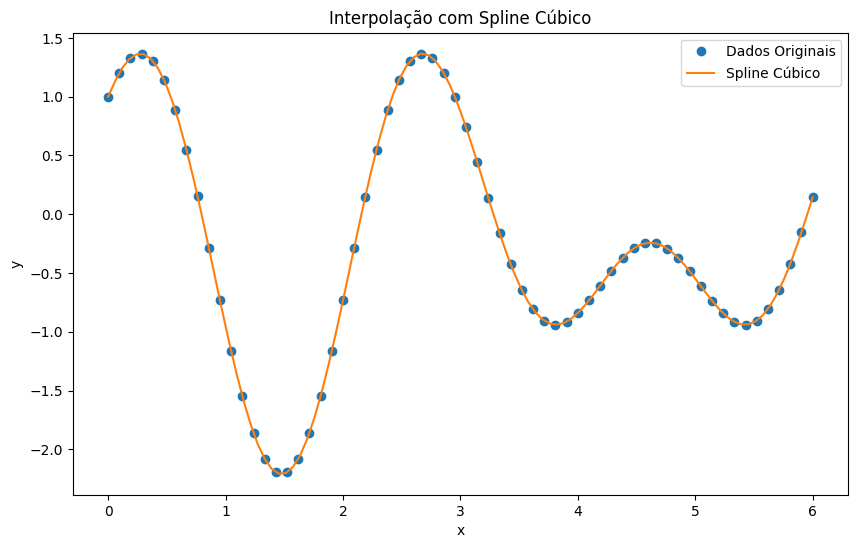

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Definição de exemplo de pontos x e y


n = len(x) - 1  # Número de splines
h = x[1] - x[0]  # Intervalo uniforme

# Montando o sistema de equações para encontrar os coeficientes c (segundas derivadas)
A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

# Condições de contorno naturais (c0 = cn = 0)
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i - 1] = h
    A[i, i] = 4 * h
    A[i, i + 1] = h
    b[i] = 3 * ((y[i + 1] - y[i]) / h - (y[i] - y[i - 1]) / h)

# Resolvendo para c
c = np.linalg.solve(A, b)

# Calculando os coeficientes a, b, e d
a = y[:-1]
b = np.zeros(n)
d = np.zeros(n)
for i in range(n):
    b[i] = (y[i + 1] - y[i]) / h - h * (2 * c[i] + c[i + 1]) / 3
    d[i] = (c[i + 1] - c[i]) / (3 * h)

# Definindo a função para avaliar o spline em um dado ponto x_val
def evaluate_spline(x_val):
    # Encontrar o intervalo que contém x_val
    if x_val < x[0] or x_val > x[-1]:
        return None  # x_val fora dos limites
    for i in range(n):
        if x[i] <= x_val <= x[i + 1]:
            delta = x_val - x[i]
            return a[i] + b[i] * delta + c[i] * delta**2 + d[i] * delta**3

# Testando a função com um exemplo
x_test = 2.5
y_test = evaluate_spline(x_test)

# Gerando pontos entre o mínimo e máximo de x para a avaliação do spline
x_vals = np.linspace(x[0], x[-1], 100)
y_vals = np.array([evaluate_spline(xi) for xi in x_vals])

# Plotando os dados originais e a curva do spline
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Dados Originais')
plt.plot(x_vals, y_vals, '-', label='Spline Cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolação com Spline Cúbico')
plt.legend()
plt.show()